Thresholding


In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
 

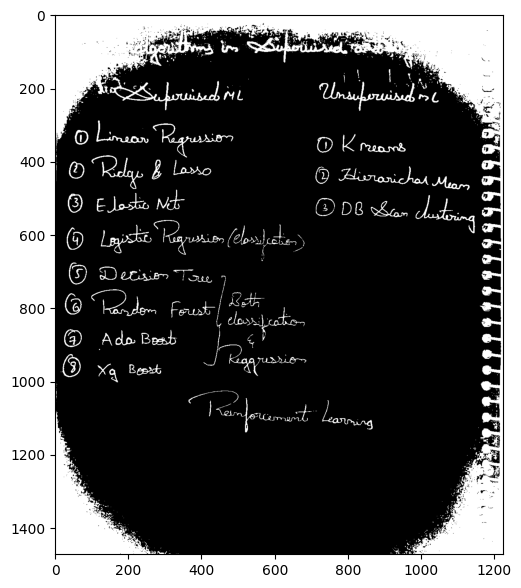

In [5]:
image = cv2.imread('handwritten.jpg',0)

retval,binary = cv2.threshold(image,150,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize=(12,7))

plt.imshow(binary, cmap='gray')
plt.show()

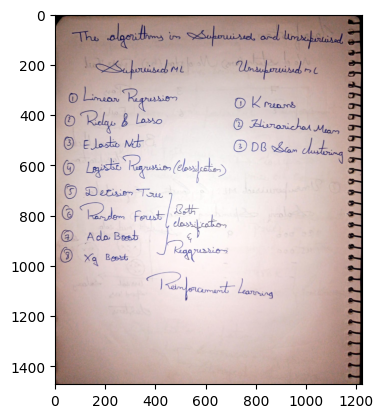

In [3]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)

Adaptive Thresholding

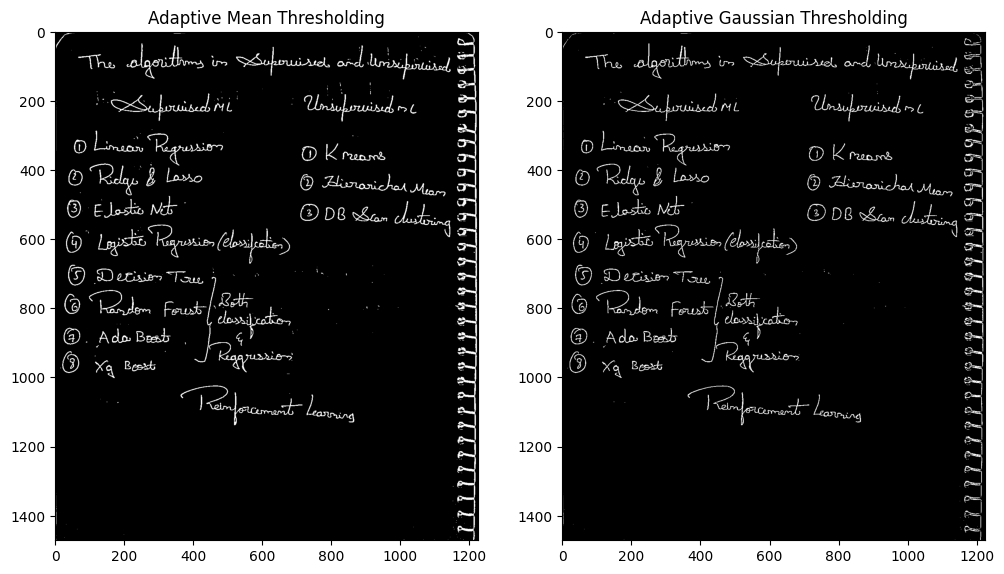

In [7]:
adaptive_mean = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,11,15)

adaptive_gausain = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,15)


plt.figure(figsize=(12,7))
plt.subplot(1,2,1)  
plt.imshow(adaptive_mean, cmap='gray')
plt.title('Adaptive Mean Thresholding')     

plt.subplot(1,2,2)
plt.imshow(adaptive_gausain, cmap='gray')           
plt.title('Adaptive Gaussian Thresholding')
plt.show()

In [10]:
image = cv2.imread('handwritten.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pixel_values = image.reshape((-1,3))


pixel_values = np.float32(pixel_values)
print(pixel_values)


[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 ...
 [ 7.  0.  0.]
 [15.  0.  5.]
 [23.  6. 12.]]


In [12]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

k = 3 


_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [14]:
print(labels.shape)
print(centers)

(1801728, 1)
[[180.40213  152.58873  146.27274 ]
 [230.07472  216.50174  215.24208 ]
 [ 49.608936  37.918446  53.67055 ]]


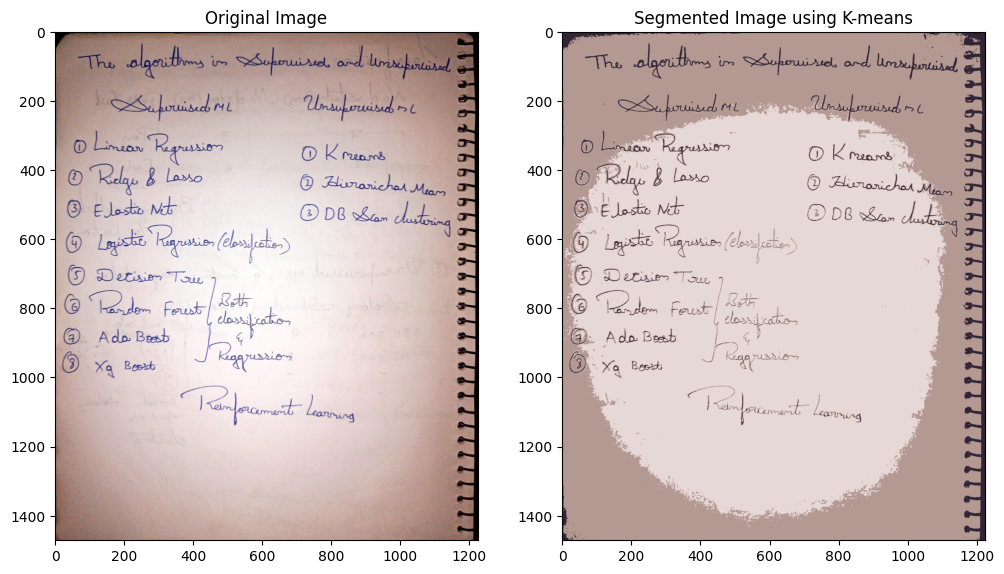

In [16]:
centers = np.uint8(centers)
centered_image = centers[labels.flatten()] 
segmented_image = centered_image.reshape(image.shape)
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)      
plt.imshow(image)
plt.title('Original Image')     
plt.subplot(1,2,2)
plt.imshow(segmented_image)
plt.title('Segmented Image using K-means')
plt.show()